# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.037724e+01     6.381093e+00
 * time: 0.002880096435546875
     1     2.981328e+01     4.159776e+00
 * time: 0.01270604133605957
     2     2.058802e+01     4.986973e+00
 * time: 0.02472996711730957
     3     1.447956e+01     3.807791e+00
 * time: 0.036720991134643555
     4     1.166531e+01     1.680390e+00
 * time: 0.04865694046020508
     5     1.148386e+01     2.560697e+00
 * time: 0.05824995040893555
     6     1.061602e+01     1.715460e+00
 * time: 0.06805109977722168
     7     9.606305e+00     2.075405e+00
 * time: 0.13120698928833008
     8     8.977941e+00     1.938164e+00
 * time: 0.1413259506225586
     9     8.638333e+00     1.195536e+00
 * time: 0.1508800983428955
    10     8.476676e+00     9.522519e-01
 * time: 0.16042804718017578
    11     8.316787e+00     8.786884e-01
 * time: 0.16991710662841797
    12     8.265044e+00     1.414426e+00
 * time: 0.1771409511566162
    13     8.201335e+00     6.752479e-01
 * time: 

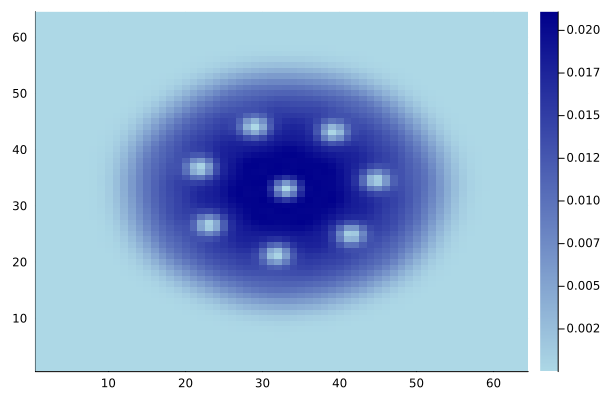

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)